In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read the file
restaurant = pd.read_csv('tripadvisor_european_restaurants.csv')

/Users/Anh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

## 1. Cleaning dataset

In [6]:
# create a list that contains the columns we need
columns = ['country', 'region', 'price_level',
           'vegetarian_friendly', 'vegan_options', 'gluten_free', 
           'open_days_per_week', 'cuisines', 'features', 'avg_rating']

In [7]:
# filter our dataset to keep only the columns needed
restaurant = restaurant.loc[:, columns]

In [8]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5


In [9]:
# filter the dataset to keep restaurants in France
restaurant = restaurant.loc[restaurant.country == 'France']

In [10]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155288 entries, 0 to 155287
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              155288 non-null  object 
 1   region               155286 non-null  object 
 2   price_level          125483 non-null  object 
 3   vegetarian_friendly  155288 non-null  object 
 4   vegan_options        155288 non-null  object 
 5   gluten_free          155288 non-null  object 
 6   open_days_per_week   85446 non-null   float64
 7   cuisines             132871 non-null  object 
 8   features             61372 non-null   object 
 9   avg_rating           144475 non-null  float64
dtypes: float64(2), object(8)
memory usage: 13.0+ MB


In [11]:
# clean the Features column in order to create a numerical column for the Reservation feature (with boolean values)
restaurant["reservation"] = np.where(restaurant.features.str.contains('Reservations') == True, 1, 0)

In [12]:
# clean the Cuisine colupmn in order to create numerical columns for each type of cuisine (with boolean values)
restaurant["cuisine_fr"] = np.where(restaurant.cuisines.str.contains('French') == True, 1, 0)
restaurant["cuisine_it"] = np.where(restaurant.cuisines.str.contains('Italian') == True, 1, 0)
restaurant["cuisine_ch"] = np.where(restaurant.cuisines.str.contains('Chinese') == True, 1, 0)
restaurant["cuisine_ff"] = np.where(restaurant.cuisines.str.contains('Fast food') == True, 1, 0)
restaurant["cuisine_jp"] = np.where(restaurant.cuisines.str.contains('Japanese') == True, 1, 0)

In [13]:
# clean the 3 columns vegetarian_friendly, vegan_options, gluten_free in order to have numerical values (boolean values)
restaurant['vegetarian'] = np.where(restaurant.vegetarian_friendly == 'N', 0, 1)
restaurant['vegan'] = np.where(restaurant.vegan_options == 'N', 0, 1)
restaurant['gluten'] = np.where(restaurant.gluten_free == 'N', 0, 1)


In [14]:
# clean the Price_level column in order to have numerical values
restaurant = pd.concat([restaurant, pd.get_dummies(restaurant.price_level)], axis=1)

## 2. Macro analysis

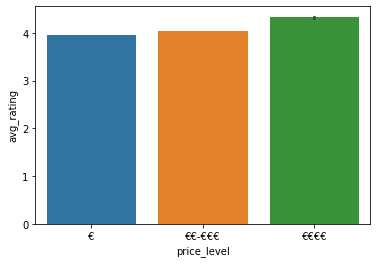

In [16]:
# bar plot between price range and the rate
sns.barplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating')

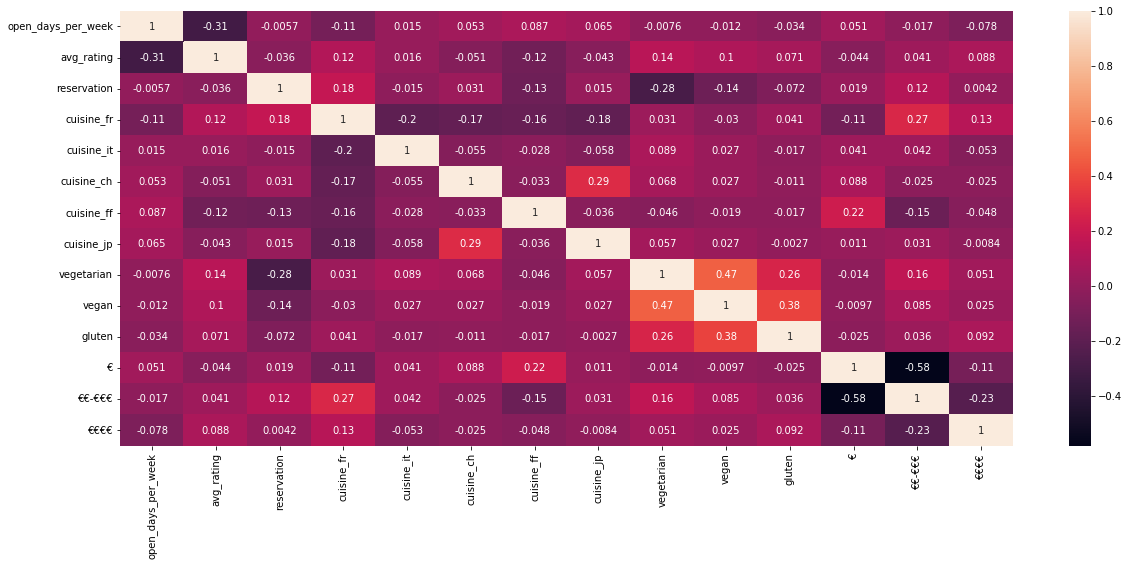

In [15]:
# correlation heat map between our target variable and the other variables
plt.figure(figsize = (20,8)) 
sns.heatmap(restaurant.corr(), annot = True)

## 3. Detail analysis on numerical data

**a. Cuisine type**

In [22]:
# keep only restaurants with 1 type of cuisine : filter on multiple cuisines and NaN restaurants
restaurant_2 = restaurant.loc[(restaurant.cuisine_fr + 
                               restaurant.cuisine_ff + 
                               restaurant.cuisine_jp + 
                               restaurant.cuisine_ch + 
                               restaurant.cuisine_it) == 1]

In [23]:
# unpivot the cuisine type columns into tidy data
rest_cuisine = restaurant_2.melt(id_vars = 'avg_rating',
                                value_vars = ['cuisine_fr', 'cuisine_jp', 'cuisine_it', 'cuisine_ff', 'cuisine_ch'],
                                var_name = 'type_cuisine',
                                value_name = 'value')

In [24]:
# clean the new dataset on the type of cuisine
rest_cuisine = rest_cuisine.loc[rest_cuisine.value != 0]

In [29]:
rest_cuisine.head()

,avg_rating,type_cuisine,value
0,4.0,cuisine_fr,1
1,5.0,cuisine_fr,1
2,4.0,cuisine_fr,1
3,4.5,cuisine_fr,1
4,4.5,cuisine_fr,1


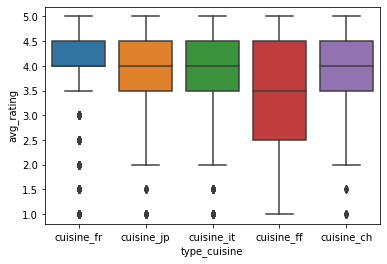

In [30]:
sns.boxplot(data=rest_cuisine, 
            x = 'type_cuisine',
            y = 'avg_rating')

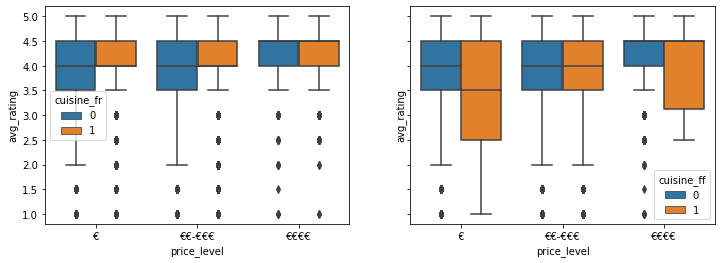

In [27]:
# focus on cuisine_fr and cuisine_ff with different price ranges
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
            hue = 'cuisine_ff',
            ax=axes[1])
sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
            hue = 'cuisine_fr',
            ax=axes[0])

**b. Special diet**

In [92]:
vege = restaurant[restaurant.vegetarian==1].groupby(by= ['avg_rating'])[['vegetarian']].count().reset_index()

In [93]:
vega = restaurant[restaurant.vegan==1].groupby(by= ['avg_rating'])[['vegan']].count().reset_index()

In [97]:
glu = restaurant[restaurant.gluten==1].groupby(by= ['avg_rating'])[['gluten']].count().reset_index()

In [137]:
restaurant_3 = pd.merge(vege,vega,on='avg_rating')
restaurant_3 = pd.merge(restaurant_3,glu,on='avg_rating')

In [138]:
rest_diet = restaurant_3.melt(id_vars = 'avg_rating',
                                value_vars = ['vegetarian','vegan','gluten'],
                                var_name = 'diet',
                                value_name = 'count')

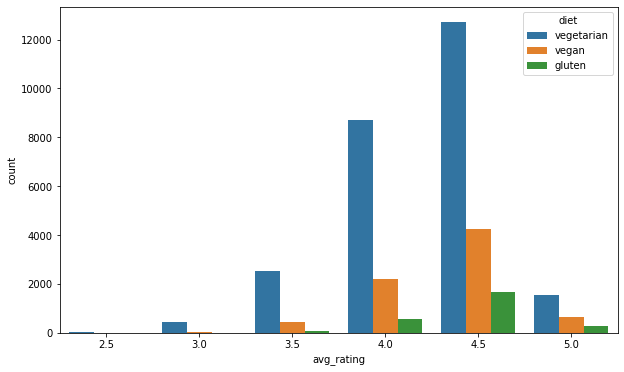

In [143]:
plt.figure(figsize = (10,6)) 
sns.barplot(data=rest_diet,
            x='avg_rating',
            y='count',
            hue='diet')

**4. Detail analysis on categorical data**

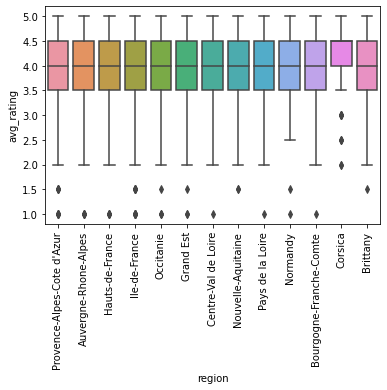

In [28]:
plt.xticks(rotation=90)
sns.boxplot(data=restaurant_2, 
            x = 'region',
            y = 'avg_rating')

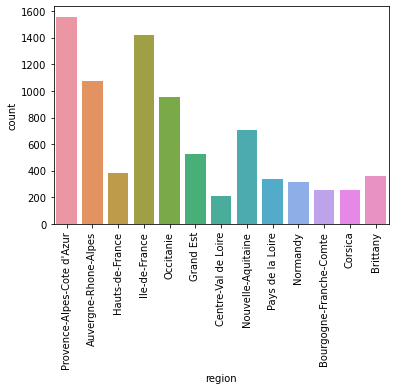

In [45]:
plt.xticks(rotation=90)
sns.countplot(data=restaurant_2,
             x='region')

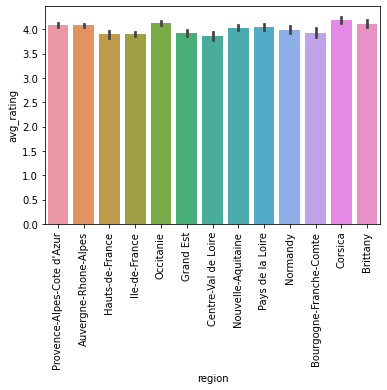

In [49]:
plt.xticks(rotation=90)
sns.barplot(data=restaurant_2, 
            x = 'region',
            y = 'avg_rating')